<h1><center><b><font color='red'>Heart Disease         </font></b></center> </h1>

<h2> Imports </h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import classification_report, mean_squared_error

<h2> Read data </h2>

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<h2> Print informations about data </h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<h2> Check if their is missing values </h2>

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h2>Some plots of the target column </h2>

In [6]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

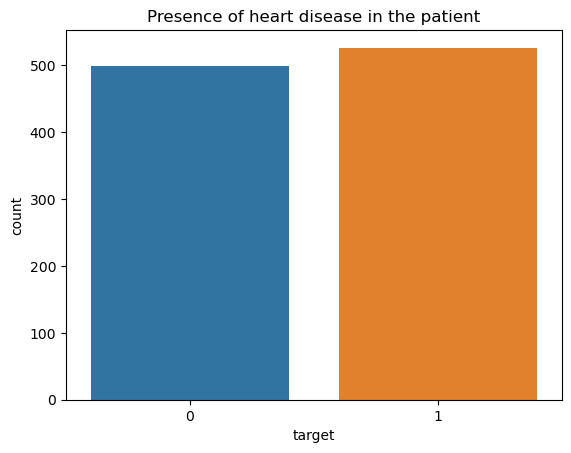

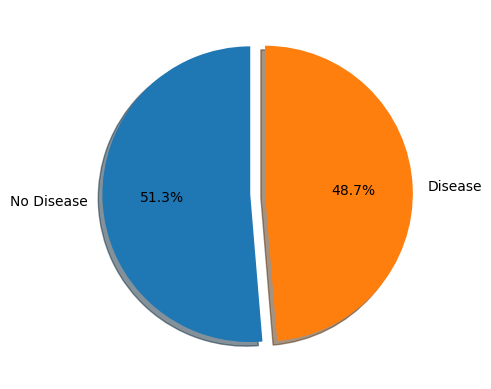

In [7]:
ax=sns.countplot(x=df['target'], data=df);
plt.title('Presence of heart disease in the patient')
plt.show()
#plt.title('Target column Distribution')
plt.pie(df['target'].value_counts(),labels = ['No Disease', 'Disease'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

<h2> Check relations between columns using pairplot </h2>

<Figure size 2000x2000 with 0 Axes>

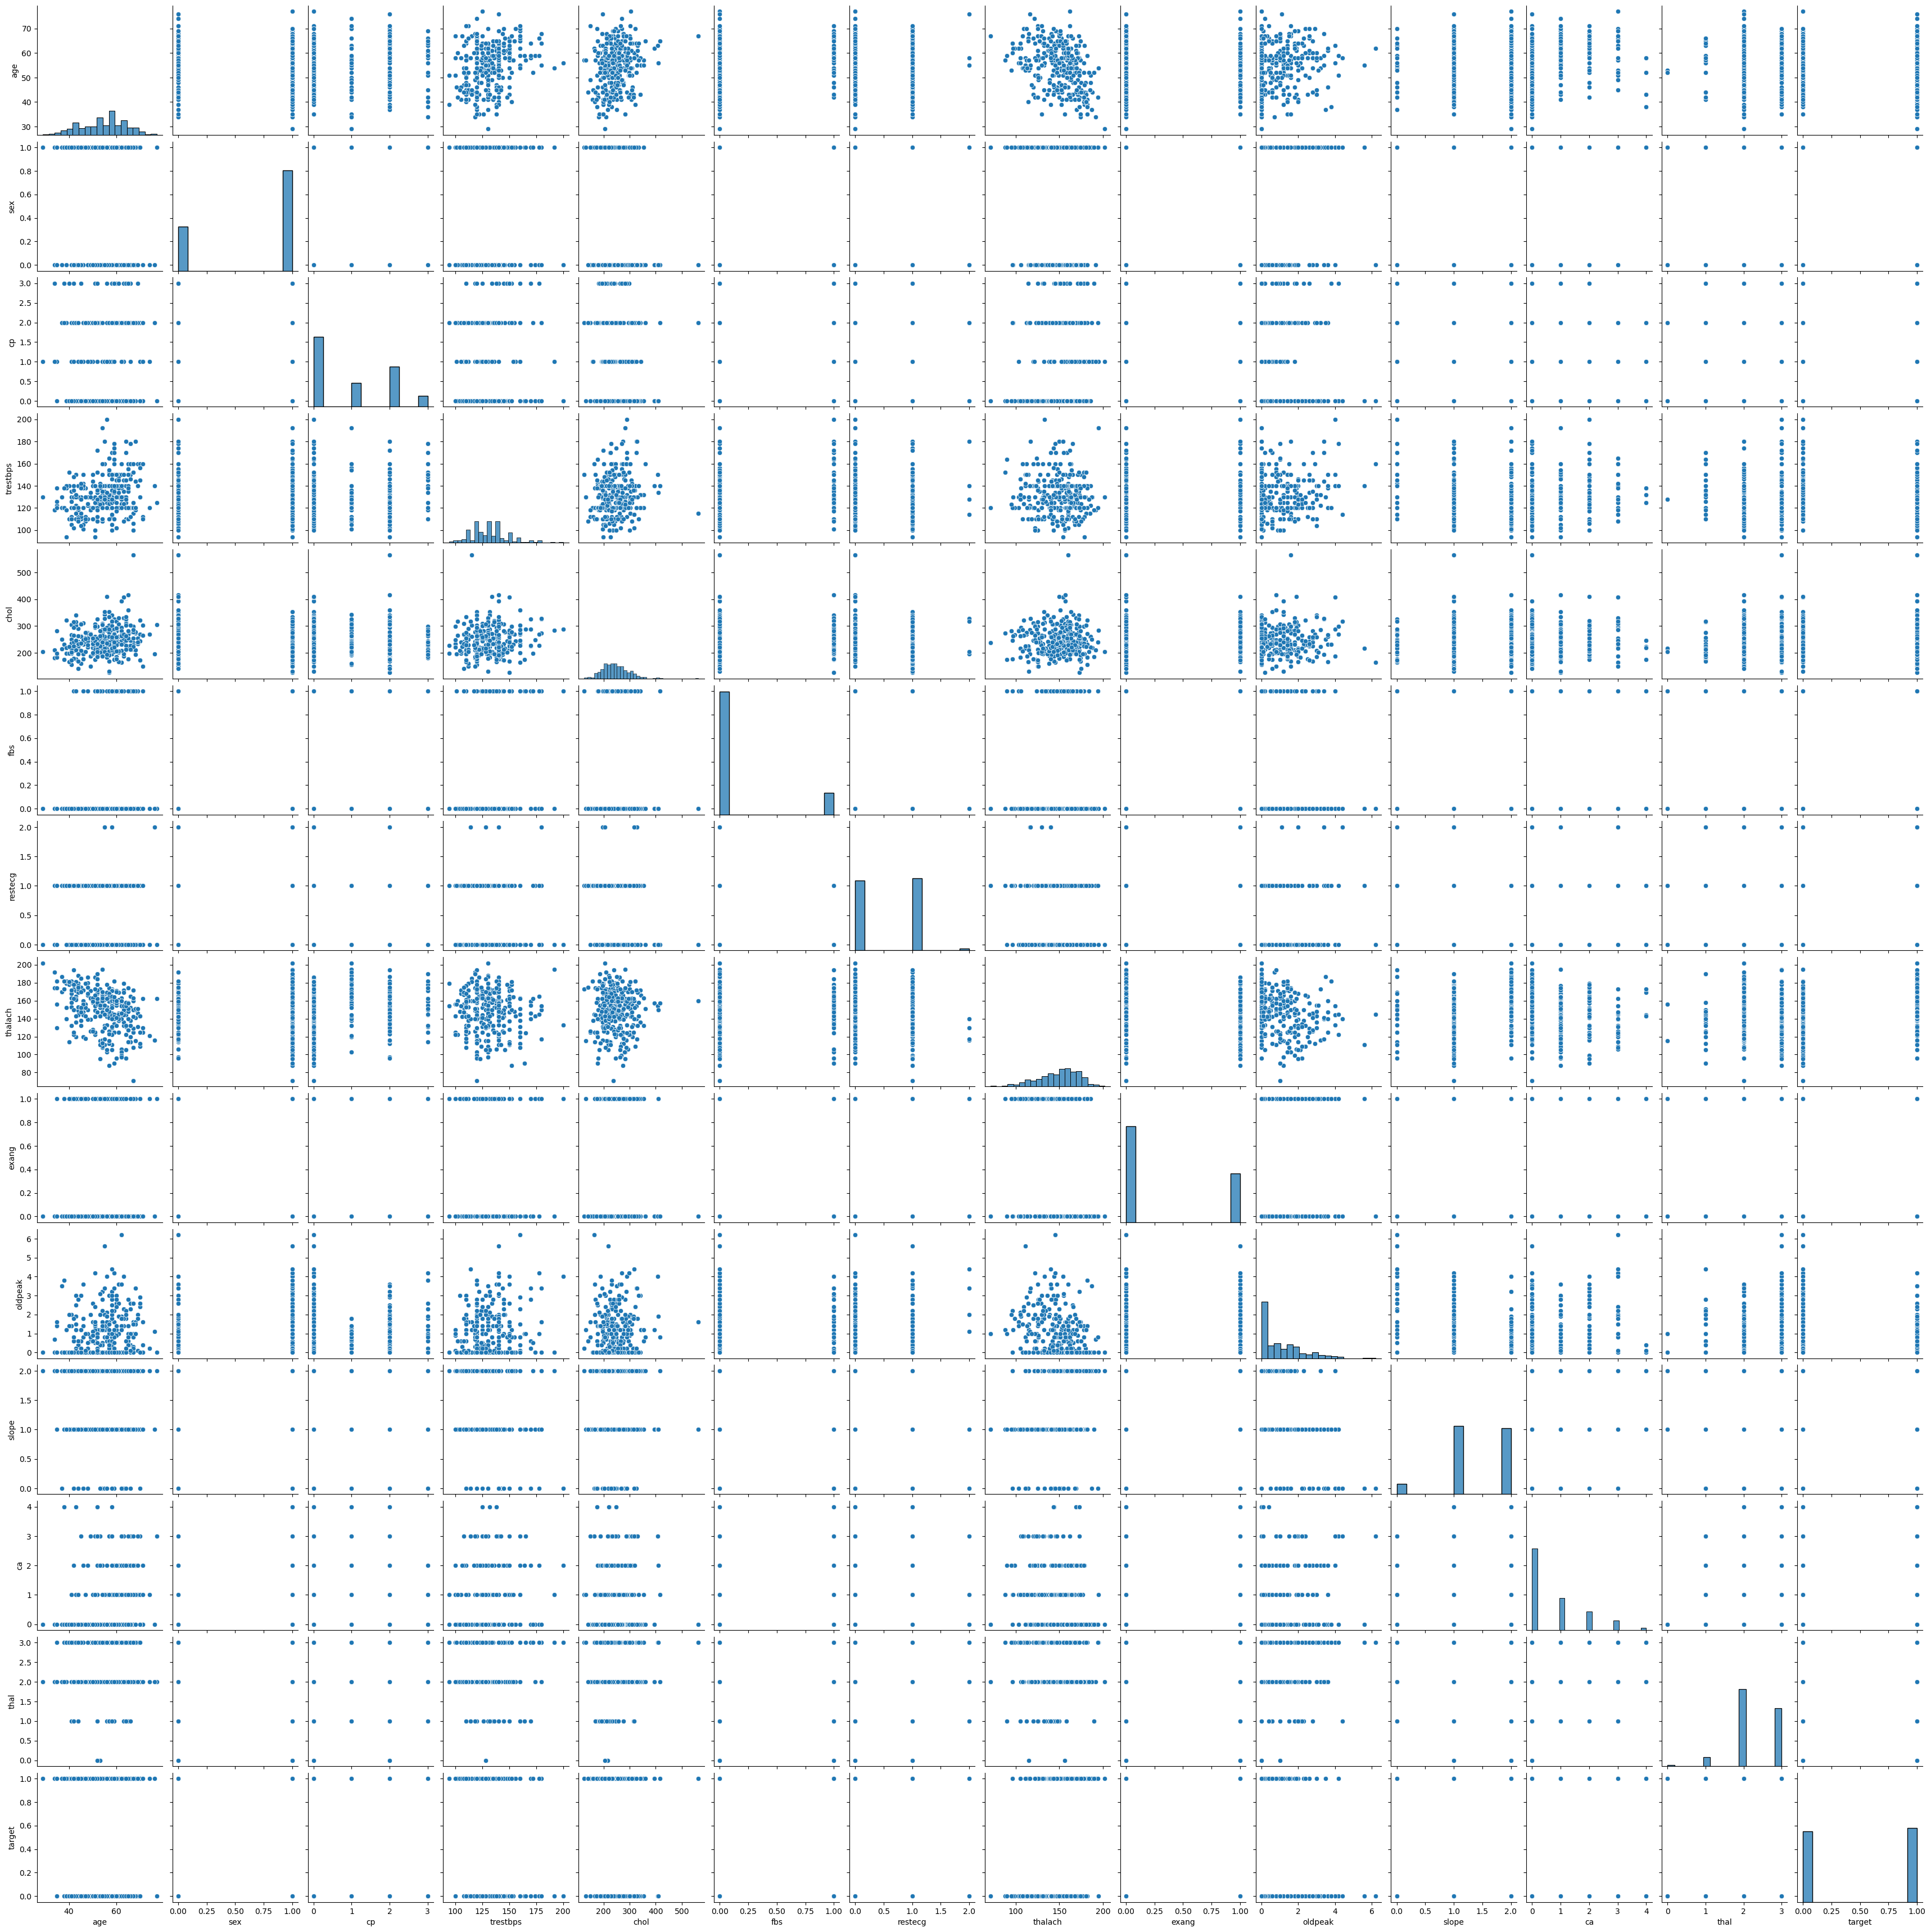

In [8]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

<h2> Check outliers using boxplot </h2>

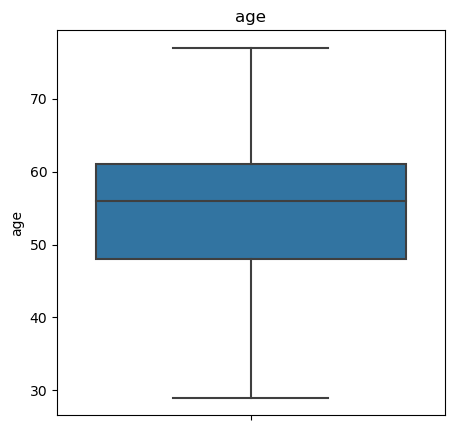

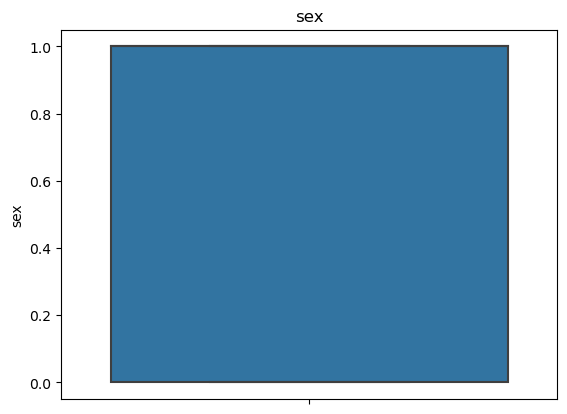

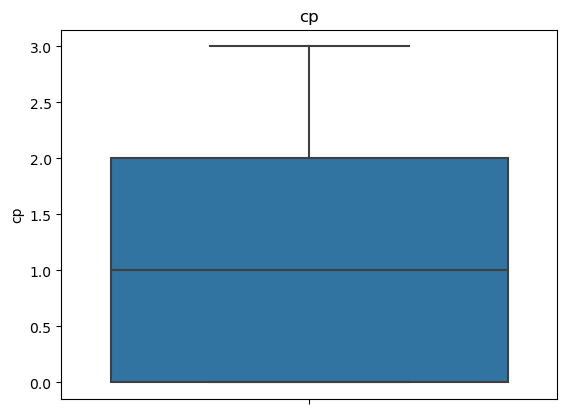

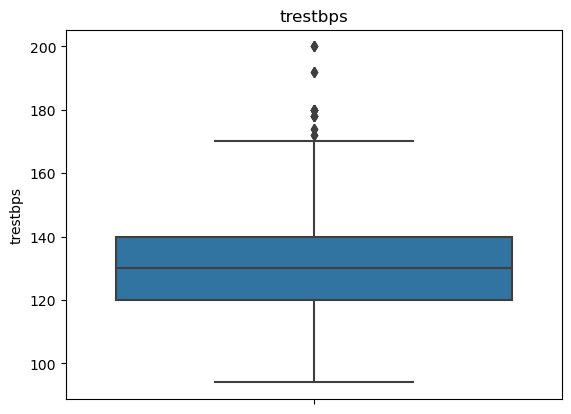

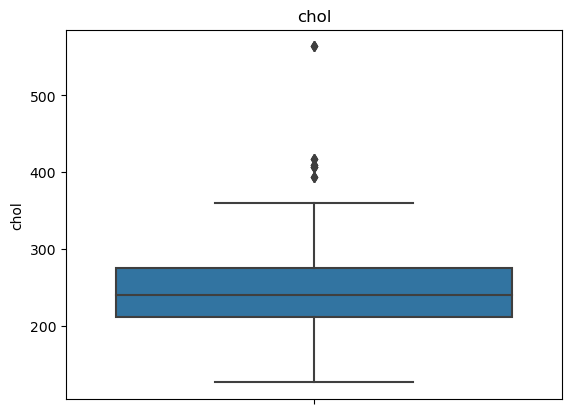

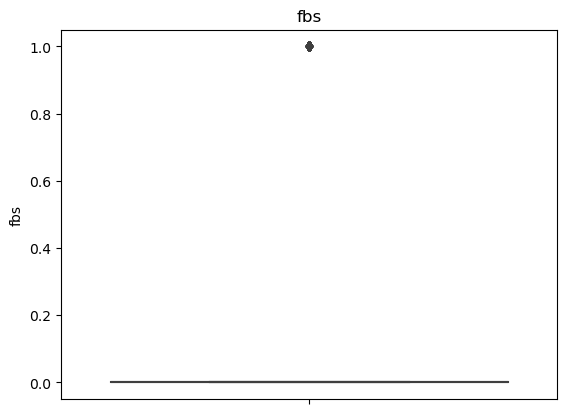

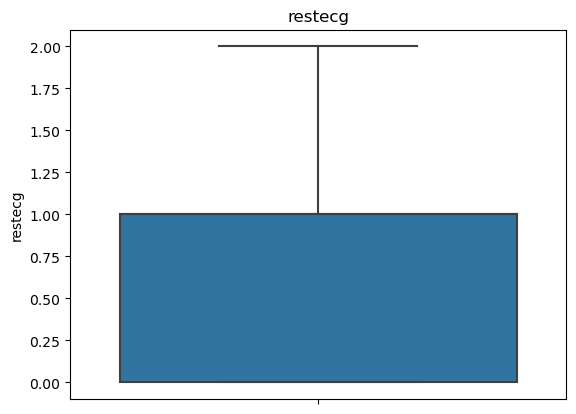

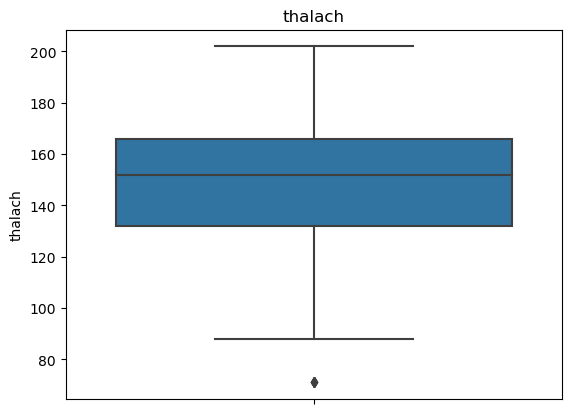

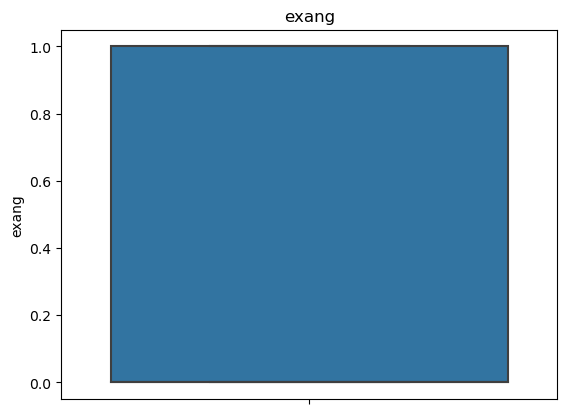

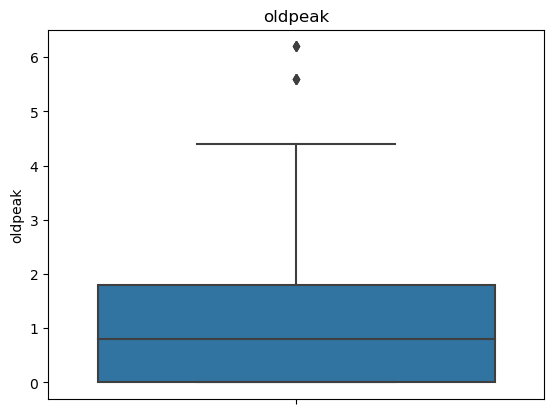

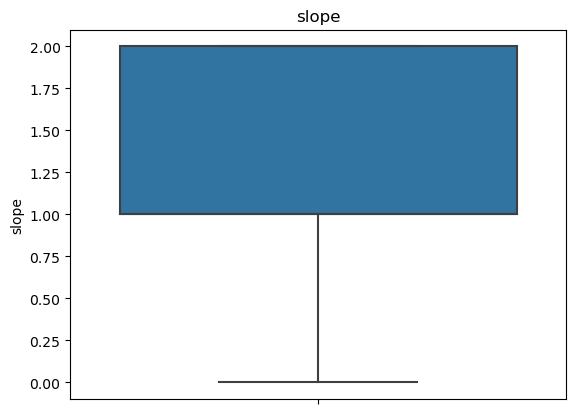

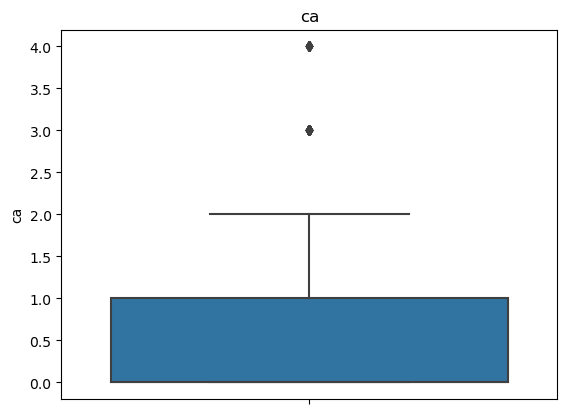

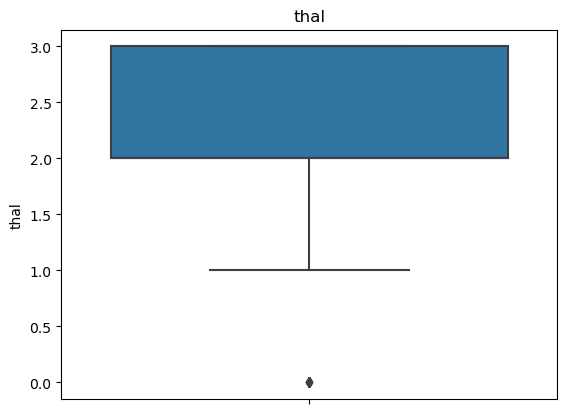

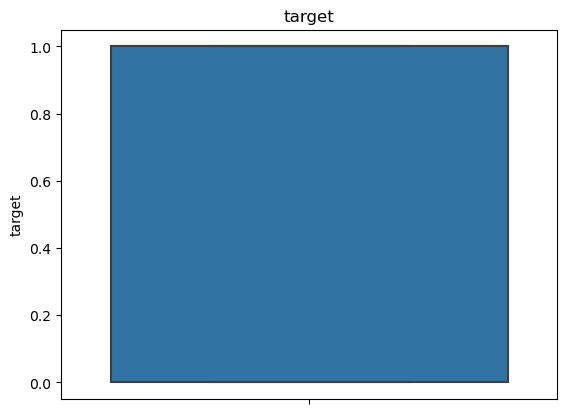

In [9]:
plt.figure(figsize=(5,5))
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

<h2> Dealing with the outliers values </h2>

In [10]:
outliers_features = ['trestbps','chol']
for i in outliers_features:
    #Finding upper and lower limt for features in train set
    Inter_Quartile_Range = df[i].quantile(0.75) - df[i].quantile(0.25)

    lower_boundary = df[i].quantile(0.25) - (Inter_Quartile_Range * 1.5)
    upper_boundary = df[i].quantile(0.75) + (Inter_Quartile_Range * 1.5)
    df[i]= np.where(df[i] > upper_boundary, upper_boundary,np.where(df[i] < lower_boundary, lower_boundary,df[i]))

<h2>Boxplot after dealing with outliers</h2>

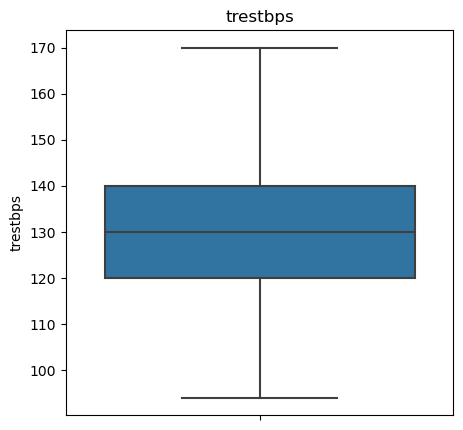

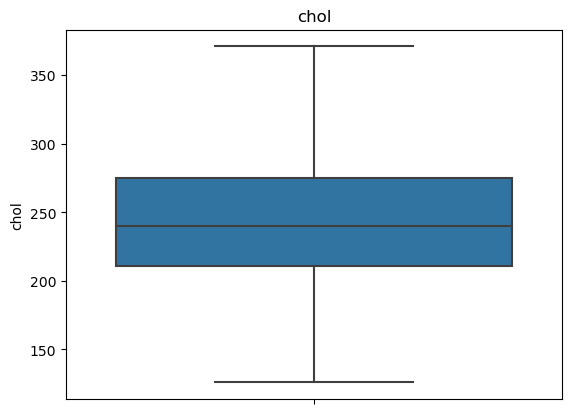

In [11]:
plt.figure(figsize=(5,5))
for i in outliers_features:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

<h2> Ploting histograms to check distributions of the attributes</h2>

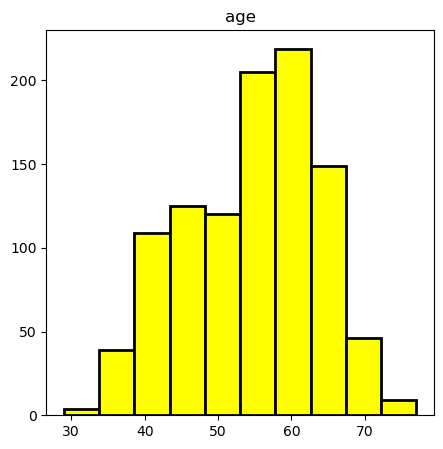

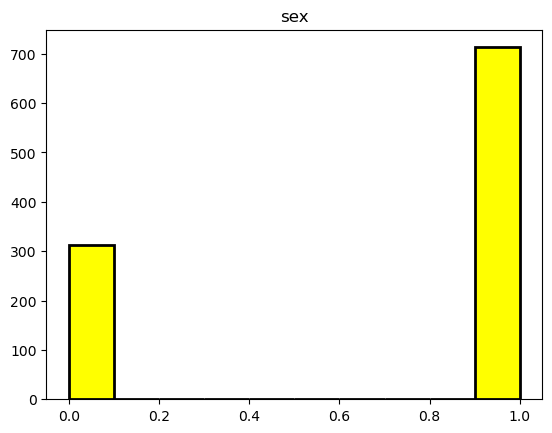

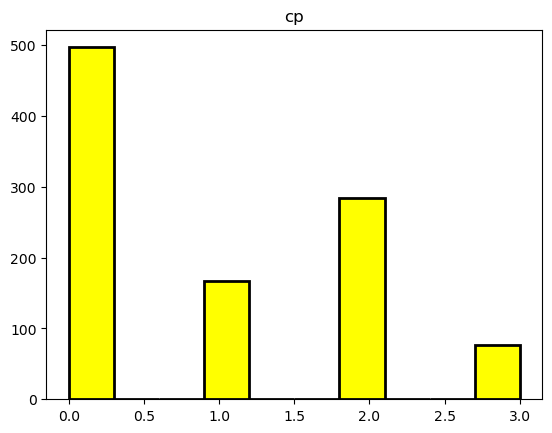

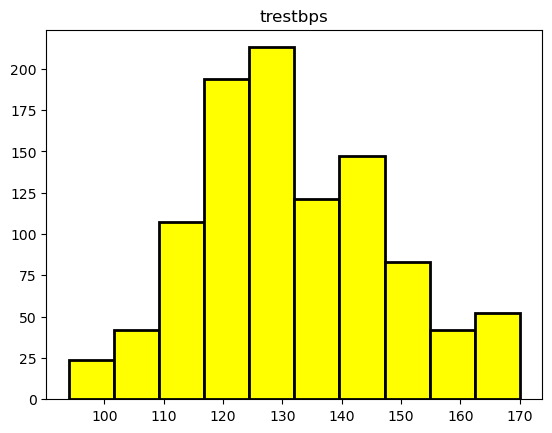

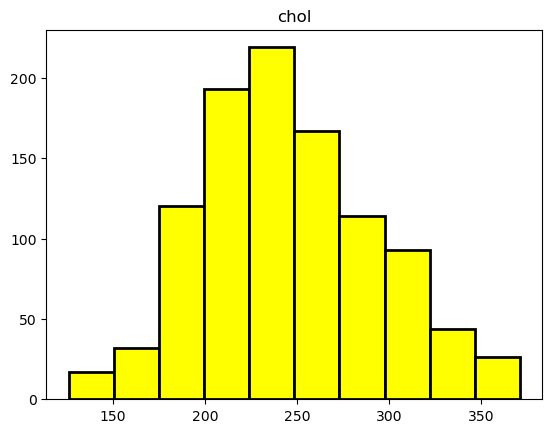

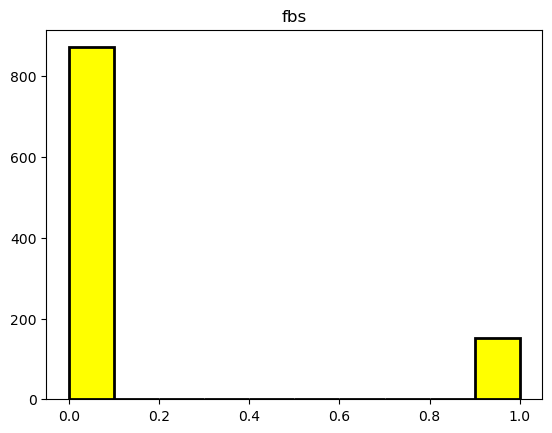

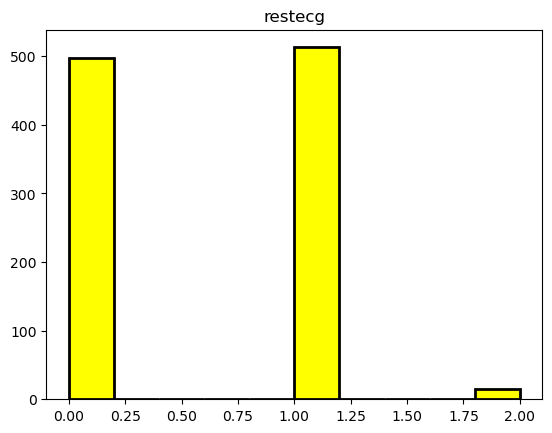

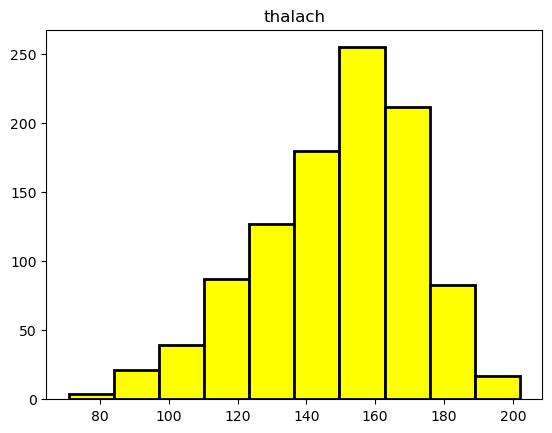

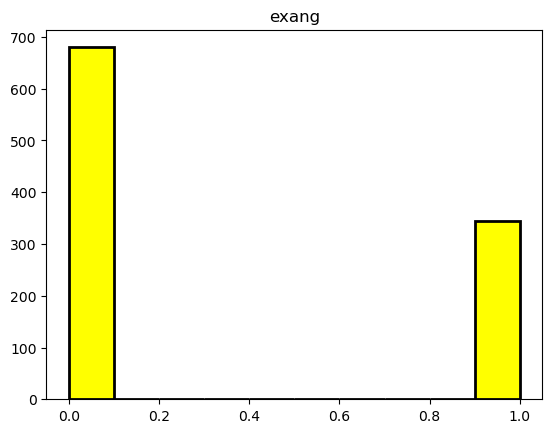

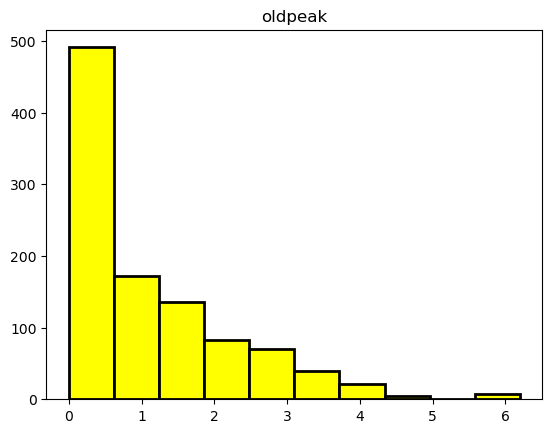

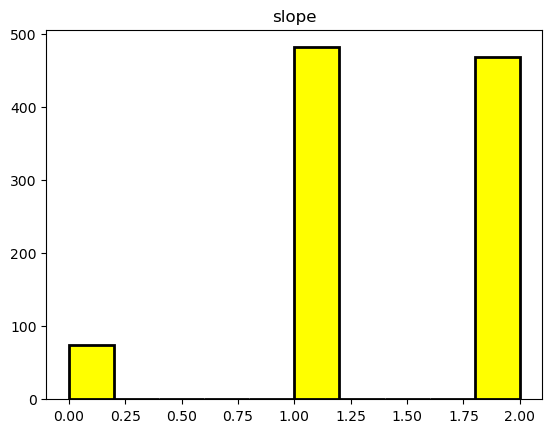

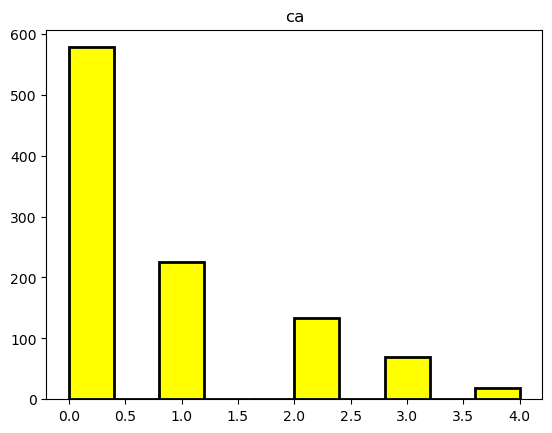

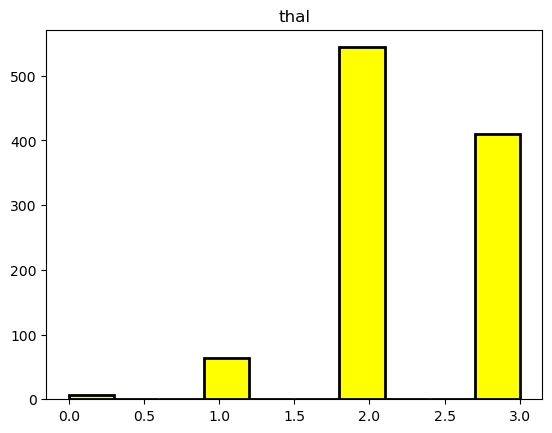

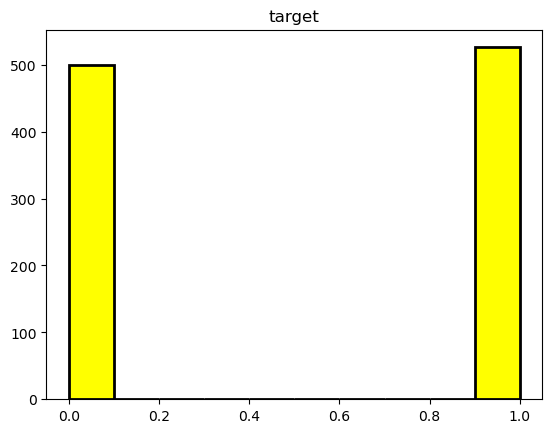

In [12]:
plt.figure(figsize=(5,5))
for i in df.columns:
    plt.hist(df[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

<h2>Check correlation between the attributes with each other</h2>

<AxesSubplot:>

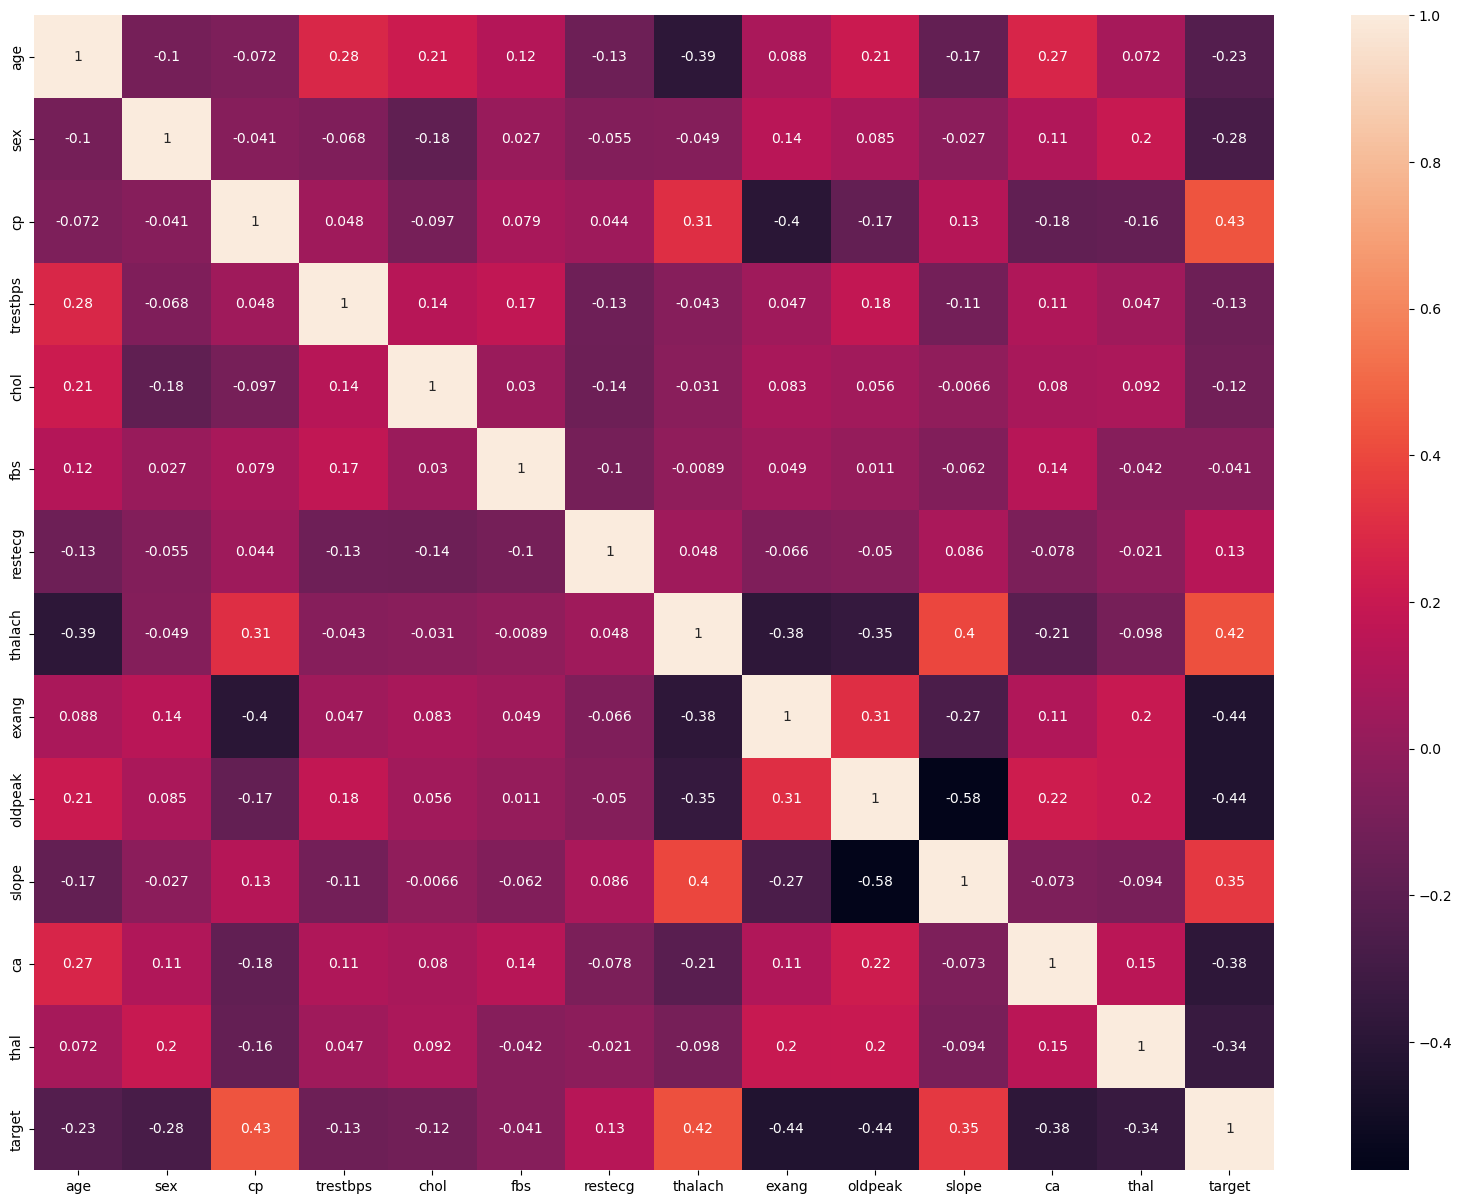

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<h2>Drop the attributes that have values near to zero</h2>

In [14]:
df2 = df.drop(['fbs'],axis=1)
df2

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,1,168,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,0,155,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258.0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275.0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254.0,0,159,0,0.0,2,0,2,1


<h2> Divide the data into features (X) and target (y)</h2>

In [15]:
X = df2.drop(['target'],axis=1)
y = df2.target

<h2> Split data into train and validation </h2>

In [16]:
from sklearn.model_selection import train_test_split  

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=42)  

<h2>Normalize the data using Minmax scaler</h2>

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


<h2> Modeling and Evaluation</h2>

In [18]:
def data_training(x_train, x_val, y_train, y_val):

    models = []
    models.append(('RF',RandomForestClassifier(max_depth=10)))
    models.append(('GBM',GradientBoostingClassifier()))
    models.append(('LightGBM',lgb.LGBMClassifier()))
    models.append(('SVM',SVC()))
    models.append(('XGBoost',xgb.XGBClassifier()))
    models.append(('Logistic Regression',LogisticRegression()))
    models.append(('Decision Tree',DecisionTreeClassifier(max_depth=10)))
    df_result = pd.DataFrame(columns=['model','Accuracy of model on train set (%)','Accuracy of model on test set (%)',"mse of model on train set","mse of model on test set",
                           "F1 score for training set (%)","F1 score for testing set (%)","ROC AUC Score for train set (%)","ROC AUC Score for test set (%)"])
    index = 0
    for name,model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_train)
        y_pred2 = model.predict(x_val)
        train_score = round(model.score(x_train, y_train)*100,0)
        test_score = round(model.score(x_val, y_val)*100,0)
        train_f1 = round(f1_score(y_pred, y_train)*100,0)
        test_f1 = round(f1_score(y_pred2, y_val)*100,0)

        train_auc = round(roc_auc_score(y_train, y_pred)*100,0)
        test_auc = round(roc_auc_score(y_val, y_pred2)*100,0)
        train_mse = round(np.sqrt(mean_squared_error(y_train, y_pred)),2)
        test_mse = round(np.sqrt(mean_squared_error(y_val, y_pred2)),2)
        df_result.at[index,['model','Accuracy of model on train set (%)','Accuracy of model on test set (%)',"mse of model on train set","mse of model on test set",
                           "F1 score for training set (%)","F1 score for testing set (%)","ROC AUC Score for train set (%)","ROC AUC Score for test set (%)"]] = [name,train_score,test_score,train_mse,test_mse,train_f1,test_f1
                                                                                                                                                 ,train_auc,test_auc]
        index += 1
    return df_result.sort_values("F1 score for testing set (%)",ascending=False)

In [19]:
dt = data_training(x_train, x_val, y_train, y_val)
dt

,model,Accuracy of model on train set (%),Accuracy of model on test set (%),mse of model on train set,mse of model on test set,F1 score for training set (%),F1 score for testing set (%),ROC AUC Score for train set (%),ROC AUC Score for test set (%)
0,RF,100.0,99.0,0.0,0.12,100.0,99.0,100.0,99.0
2,LightGBM,100.0,99.0,0.0,0.12,100.0,99.0,100.0,99.0
4,XGBoost,100.0,99.0,0.0,0.12,100.0,99.0,100.0,99.0
6,Decision Tree,100.0,99.0,0.0,0.12,100.0,99.0,100.0,99.0
1,GBM,98.0,94.0,0.13,0.25,98.0,94.0,98.0,94.0
3,SVM,91.0,85.0,0.3,0.39,92.0,86.0,91.0,85.0
5,Logistic Regression,86.0,82.0,0.37,0.42,87.0,84.0,86.0,82.0


In [20]:
model=RandomForestClassifier(max_depth=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [21]:
y_pred = model.predict(x_val)

[[102   0]
 [  3 100]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


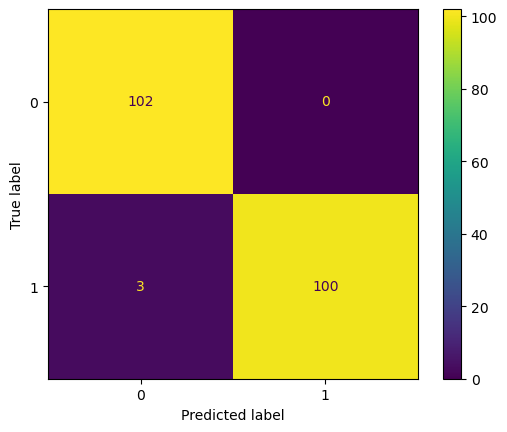

True Negatives:  102
False Positives:  0
False Negatives:  3
True Positives:  100


In [22]:
cfm = confusion_matrix(y_val, y_pred=y_pred)
print(cfm)
plot_confusion_matrix(model, x_val, y_val)  
plt.show()
tn, fp, fn, tp = cfm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [23]:
print(classification_report(y_val,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

